# Titanic 6: Model Selection

## 1. Preprocessing Pipeline

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# reading
data = pd.read_csv('data/titanic.zip')

# X and y creation
X = data.drop(columns=["PassengerId", "Name", "Ticket"])
y = X.pop("Survived")

# Feature Engineering
X.loc[:, "Cabin"] = X.Cabin.str[0]

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# building the pipeline
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

## 2. Modelling (Decision Tree)

In [4]:
from sklearn.model_selection import GridSearchCV

full_pipeline = make_pipeline(preprocessor,
                              DecisionTreeClassifier())

param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'dtree': np.float64(0.8061656653205947)}

## 3. Error analysis

In [ ]:
# test accuracy
accuracy_score(search.predict(X_test), y_test)

0.8435754189944135

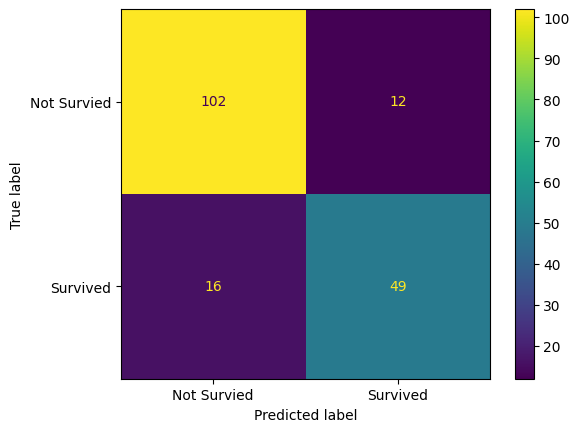

In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(search, X_test, y_test, display_labels=['Not Survied', 'Survived']);

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search,
                                      X_test,
                                      y_test,
                                      display_labels=['Not Survied', 'Survived']);

**Watch out!**

Scikit-learn presents confusion matrices in a way that might differ slightly from what you're used to.

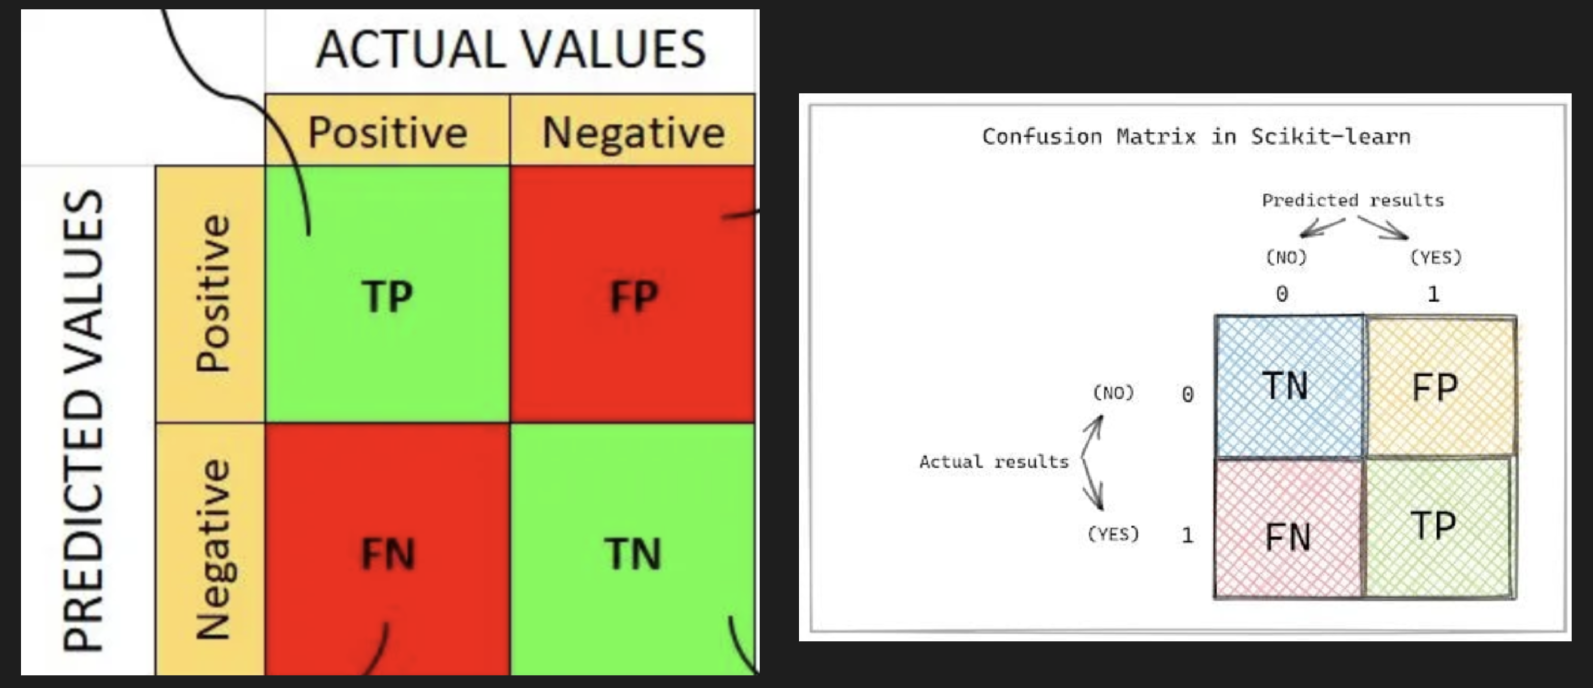

The [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) developers chose this layout because in binary classification, the "positive" class is typically labeled `1` and the "negative" class is labeled `0`. So when you think about it in terms of indexing, it makes sense that `C[0,0]` is the count of the true negatives and `C[1,1]` is the count of the true positives. The confusion matrix is laid out such that it matches the indexing of the output classes.

The [convention](https://builtin.com/data-science/confusion-matrix-python) is that the first index refers to the true class and the second index refers to the predicted class.

Therefore:
- `C[0,0]` corresponds to the count of the True Negatives, the top-left quadrant.
- `C[0,1]` corresponds to the count of False Positives, the top-right quadrant.
- `C[1,0]` corresponds to the count of False Negatives, the bottom-left quadrant.
- `C[1,1]` corresponds to the count of True Positives, the bottom-right quadrant.

### **Exercise 1:** build the same pipeline using a KNN instead of a decision tree.

Read the Platform lesson on KNN: https://learn.wbscodingschool.com/topic/%f0%9f%93%9d-iteration-5-k-nearest-neighbors/

> **Tip**: Check the SciKit-Learn docummentation to find how to import the KNN model for this task and how to tune its hyperparameters (the names and possible values of the parameters).


In [ ]:
# your code here

### **Exercise 2:** build the same pipeline using other algorithms

Go through the Plaform lesson on Model Selection () and check the performance of, at least, the following algorithms:

* Logistic Regression
* Support Vector Machine
* Random Forest

In [ ]:
# your code here

## **Your challenge**

In a new notebook, apply everything you have learned here to the Housing project, following the Learning platform.